# Lesson 03: Overfitting, Regularization and Drop Out


In [1]:
from __future__ import print_function

from tensorflow.python import keras
from tensorflow.python.keras.datasets import mnist
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.python.keras.optimizers import RMSprop
from tensorflow.python.keras import backend as K

from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn
import pandas as pd

%matplotlib inline

/home/admin-cip/anaconda3/envs/tensorflow/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/admin-cip/anaconda3/envs/tensorflow/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
# Hyperparameters
batch_size = 512
num_classes = 10
epochs = 20

In [3]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Save test ground truth for the confusion matrix
y_true=y_test

# convert class vectors to binary class matrices
# "One-Hot-Encoding"
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

60000 train samples
10000 test samples


In [4]:
baseline_model = Sequential()
baseline_model.add(Dense(1024, activation='relu', input_shape=(784,)))
baseline_model.add(Dense(512, activation='relu', input_shape=(1024,)))
baseline_model.add(Dense(num_classes, activation='softmax'))

In [5]:
baseline_model.compile(loss=keras.losses.mean_squared_error,
              optimizer="adam",
              metrics=['accuracy'])

Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [6]:
baseline_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1024)              803840    
_________________________________________________________________
dense_2 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 1,333,770
Trainable params: 1,333,770
Non-trainable params: 0
_________________________________________________________________


In [7]:
# Fit the model
history = baseline_model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================]60000/60000 [==============================] - 3s 48us/step - loss: 0.0138 - acc: 0.9103 - val_loss: 0.0066 - val_acc: 0.9561

Epoch 2/20
60000/60000 [==============================]60000/60000 [==============================] - 1s 21us/step - loss: 0.0052 - acc: 0.9678 - val_loss: 0.0045 - val_acc: 0.9700

Epoch 3/20
60000/60000 [==============================]60000/60000 [==============================] - 1s 20us/step - loss: 0.0034 - acc: 0.9790 - val_loss: 0.0038 - val_acc: 0.9747

Epoch 4/20
60000/60000 [==============================]60000/60000 [==============================] - 1s 20us/step - loss: 0.0025 - acc: 0.9848 - val_loss: 0.0035 - val_acc: 0.9778

Epoch 5/20
60000/60000 [==============================]60000/60000 [==============================] - 1s 19us/step - loss: 0.0020 - acc: 0.9880 - val_loss: 0.0030 - val_acc: 0.9796

Epoch 6/20
60000/60000 [================

In [8]:
# list all data in history
print(history.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


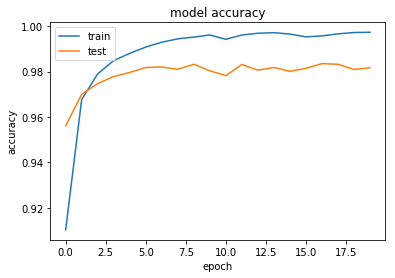

In [9]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

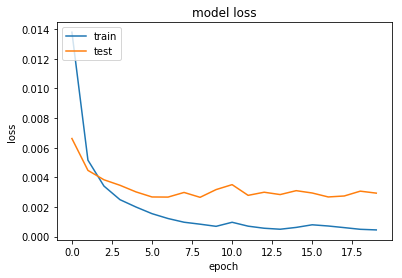

In [10]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [11]:
score = baseline_model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.002932275430106764
Test accuracy: 0.9817
